## NLP - Article's analysis

In [29]:
# import librairies
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import spacy
from collections import defaultdict
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [30]:
# configuration
nlp = spacy.load('en_core_web_sm')

In [31]:
# import data
article = pd.read_csv("/Users/ranu/Documents/Data-Science-project/Text analysis/input/articles.csv", encoding="latin1")

In [32]:
# informations about data
article.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Article  34 non-null     object
 1   Title    34 non-null     object
dtypes: object(2)
memory usage: 676.0+ bytes


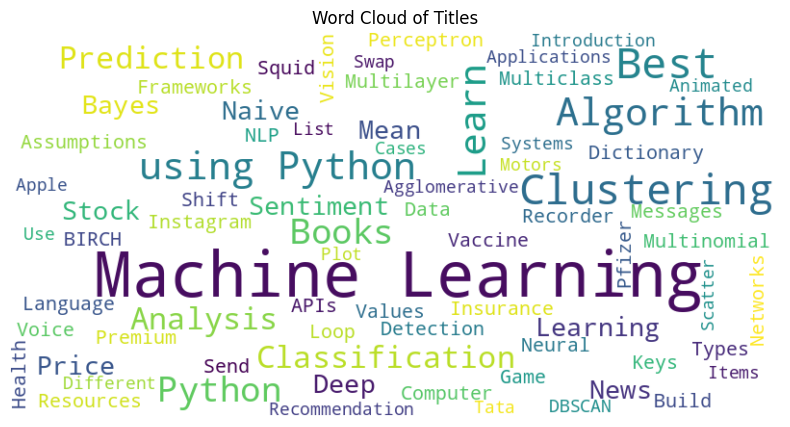

In [33]:
# Retrive articles' titles
titles_text = ' '.join(article.Title)

# Create a WordCloud object
wordcloud_title = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Titles")
plt.show()

Many scientific terms were observed on this word cloud. The main term which used is "Machine Learning". These articles are focused on "machine learning".

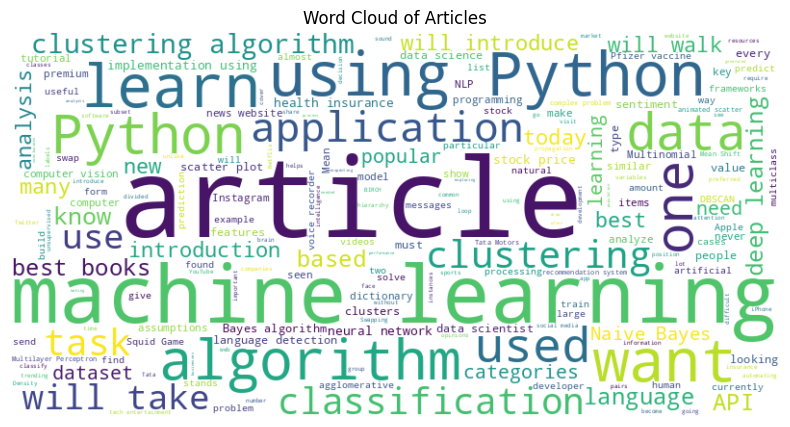

In [34]:
 # Retrive articles
articles_text = ' '.join(article.Article)

# Create a WordCloud object
wordcloud_article = WordCloud(width=800, height=400, background_color='white').generate(articles_text)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_article, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Articles")
plt.show()

It will be interesting to know what is the global opinion from each of these articles.

In [35]:
# Sentiment Analysis
article['Sentiment'] = article['Article'].apply(lambda x: TextBlob(x).sentiment.polarity)

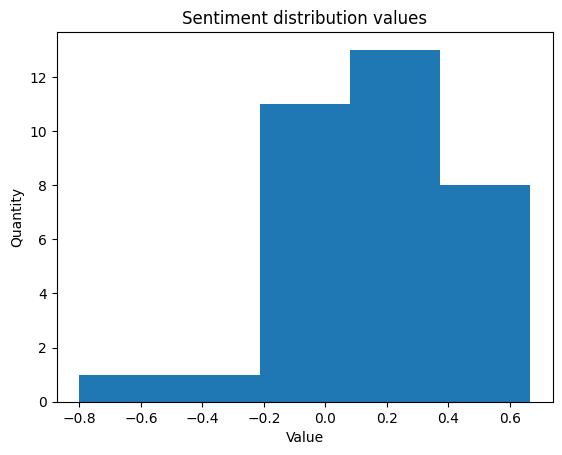

In [36]:
# Histogram of sentiment values
plt.hist(article['Sentiment'].tolist(), bins = 5)
plt.title("Sentiment distribution values")
plt.xlabel("Value")
plt.ylabel("Quantity")
plt.show()

In [41]:
# import function extract_named_entities
%run /Users/ranu/Documents/Data-Science-project/"Text analysis"/utils/extract_named_entities.py

In [42]:
# Entities name
article['Named_Entities'] = article['Article'].apply(extract_named_entities)

# Visualize NER
entity_counts = Counter(entity for entities in article['Named_Entities'] for entity in entities)
entity_df = pd.DataFrame.from_dict(entity_counts, orient='index').reset_index()
entity_df.columns = ['Entity', 'Count']

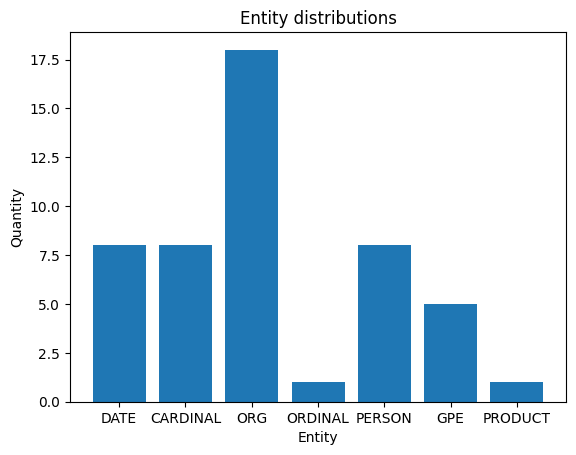

In [44]:
# Histogram of sentiment values
plt.bar(entity_df["Entity"], entity_df['Count'])
plt.title("Entity distributions")
plt.xlabel("Entity")
plt.ylabel("Quantity")
plt.show()